# Bootstrap Aggregating or Bagging

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df.dropna(inplace=True)

In [5]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [6]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

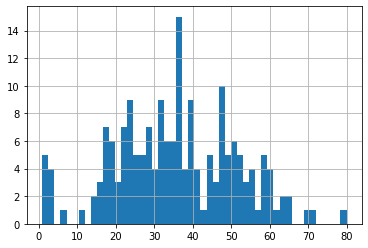

In [9]:
df['age'].hist(bins=50);

## Data Pre-processing

In [10]:
X = df[['pclass', 'sex', 'age']]

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [12]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [14]:
X.shape

(182, 3)

In [15]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [17]:
y = df['survived']

In [18]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

## Fit The Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

## Decision Tree

In [24]:
clf = DecisionTreeClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.99      0.95      0.97        87

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[39  1]
 [ 4 83]]

Average Accuracy: 	 0.7936
Accuracy SD: 		 0.0851


In [27]:
# Test
print_score(clf, X_train, y_train, X_test, y_test, train=False) 

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.81      0.83      0.82        36

    accuracy                           0.76        55
   macro avg       0.74      0.73      0.74        55
weighted avg       0.76      0.76      0.76        55


Confusion Matrix: 
 [[12  7]
 [ 6 30]]



***

## Bagging (oob_score=False)

In [28]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, n_jobs=-1, random_state=42)

In [29]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [30]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.98      0.97      0.97        87

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[38  2]
 [ 3 84]]

Average Accuracy: 	 0.7936
Accuracy SD: 		 0.0851


In [31]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.82      0.86      0.84        36

    accuracy                           0.78        55
   macro avg       0.76      0.75      0.75        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[12  7]
 [ 5 31]]



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [32]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                           bootstrap=True, oob_score=True, 
                            n_jobs=-1, random_state=42)

In [33]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [34]:
bag_clf.oob_score_

0.7952755905511811

In [35]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.98      0.97      0.97        87

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[38  2]
 [ 3 84]]

Average Accuracy: 	 0.7936
Accuracy SD: 		 0.0851


In [36]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.82      0.86      0.84        36

    accuracy                           0.78        55
   macro avg       0.76      0.75      0.75        55
weighted avg       0.78      0.78      0.78        55


Confusion Matrix: 
 [[12  7]
 [ 5 31]]



***

## AdaBoost / Adaptive Boosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ada_clf = AdaBoostClassifier()

In [39]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [40]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9134

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.95      0.92      0.94        87

    accuracy                           0.91       127
   macro avg       0.89      0.91      0.90       127
weighted avg       0.92      0.91      0.91       127


Confusion Matrix: 
 [[36  4]
 [ 7 80]]

Average Accuracy: 	 0.7455
Accuracy SD: 		 0.1236


In [41]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7091

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        19
           1       0.78      0.78      0.78        36

    accuracy                           0.71        55
   macro avg       0.68      0.68      0.68        55
weighted avg       0.71      0.71      0.71        55


Confusion Matrix: 
 [[11  8]
 [ 8 28]]



## AdaBoost with Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))

In [44]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [45]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.98      0.97      0.97        87

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[38  2]
 [ 3 84]]

Average Accuracy: 	 0.7699
Accuracy SD: 		 0.0952


In [46]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8000

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.84      0.86      0.85        36

    accuracy                           0.80        55
   macro avg       0.78      0.77      0.78        55
weighted avg       0.80      0.80      0.80        55


Confusion Matrix: 
 [[13  6]
 [ 5 31]]



***

In [47]:
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100))

In [48]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [49]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.97      0.98      0.97        87

    accuracy                           0.96       127
   macro avg       0.96      0.95      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[37  3]
 [ 2 85]]

Average Accuracy: 	 0.7622
Accuracy SD: 		 0.0980


In [50]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8000

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.84      0.86      0.85        36

    accuracy                           0.80        55
   macro avg       0.78      0.77      0.78        55
weighted avg       0.80      0.80      0.80        55


Confusion Matrix: 
 [[13  6]
 [ 5 31]]



***

## Gradient Boosting / Gradient Boosting Machine (GBM)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.98      0.97      0.97        87

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.96      0.96      0.96       127


Confusion Matrix: 
 [[38  2]
 [ 3 84]]

Average Accuracy: 	 0.7859
Accuracy SD: 		 0.0903


In [54]:
# Test
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7636

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.79      0.86      0.83        36

    accuracy                           0.76        55
   macro avg       0.74      0.72      0.73        55
weighted avg       0.76      0.76      0.76        55


Confusion Matrix: 
 [[11  8]
 [ 5 31]]



***

## XGBoost (Extreme Gradient Boosting)

In [55]:
import xgboost as xgb

In [56]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [57]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.95      0.97      0.96        87

    accuracy                           0.94       127
   macro avg       0.94      0.93      0.94       127
weighted avg       0.94      0.94      0.94       127


Confusion Matrix: 
 [[36  4]
 [ 3 84]]

Average Accuracy: 	 0.8250
Accuracy SD: 		 0.0972


In [59]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7818

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.80      0.89      0.84        36

    accuracy                           0.78        55
   macro avg       0.77      0.73      0.74        55
weighted avg       0.78      0.78      0.77        55


Confusion Matrix: 
 [[11  8]
 [ 4 32]]



***